<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/Aula_3_6_DTS_PLN_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Demostração - Aula 3**

# **Análise de Tópicos**

<font size=5>
Análise, ou Modelagem, de Tópicos nos permite analisar grandes volumes de texto atravéz de técnicas de clusterização ou agrupamento dos documentos em tópicos!
<br/>
<br/>
Grande parte dos dados disponíveis no mundo real não estão classificados e por isso não podemos aplicar as técnicas de aprendizado supervisionado que usamos anteriormente!
<br/>
<br/>

Nestes casos, onde trabalhamos com dados não classificados, podemos tentar encontrar suas classificações agrupando-os em tópicos.

  </font>




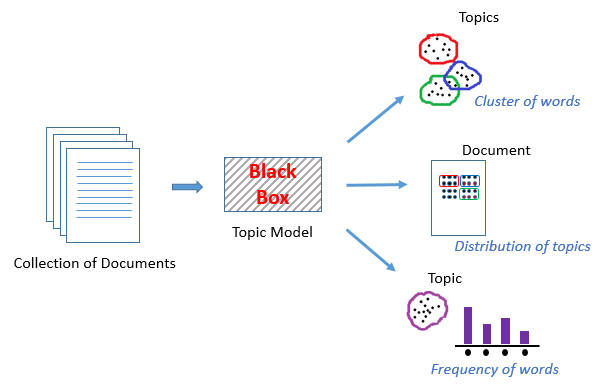

## **Importante!**

<font size=4>
Por não termos junto aos dados sua verdadeira classificação, nesses casos não sabemos a "resposta correta" o que torna muito difícil mensurar o quanto nosso algoritmo está acertando ou errando!
<br/>
<br/>

Tudo que sabemos (ou assumimos) é que documentos que forem agrupados no mesmo tópico compartilham ideias similares.
<br/>
<br/>

Fica a cargo do usuário (cientista/analista de dados, eng. machine learning e etc) se os grupos formados são coerentes e o que cada grupo representa!
</font>

# **LDA - Latent Dirichlet Allocation**

<font size=5>
LDA ou Latent Dirichlet Allocation é um “modelo probabilístico generativo” de uma coleção composta de partes. Em termos de modelagem de tópicos, as coleções são documentos e as partes são palavras, ou frases (n-gramas).  
<br/>
<br/>
O LDA tem esse nome pois usa a Distribuição Dirichlet (do matemático alemão Johann Peter Gustav Lejeune Dirichlet) para encontrar tópicos "latentes" nos documentos.
<br/>
<br/>
Em 2003, esse método foi publicado pela primeira vez por David Blei, Andrew Ng e Michael Jordan e pode ser
<a href="http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf">lido aqui</a>
<br/>
<br/>

Para entender melhor como o método funciona recomendo a leitura do artigo original no link acima!
  
</font>



## LDA

<font size=5>
Existem algumas premissas na aplicação do LDA:
<br/>
<br/>

1.   Documentos com assuntos similares usam palavras similares<br/>
2.   Os tópicos latentes podem ser encontrados atravez dos grupos de palavras que ocorrem juntas<br/>
3.   Documentos são distribuições de probabilidade sobre os tópicos latentes<br/>
4.   Tópicos são também distribuições de probabilidade sobre as palavras<br/>

</font>

## Documentos são distribuições de probabilidade sobre os tópicos latentes

![alt text](https://i.ibb.co/C2gs3mS/doc-prob-topics.png)

## Tópicos são também distribuições de probabilidade sobre as palavras

![alt text](https://i.ibb.co/KskDmbD/topic-prob-words.png)

## **Exemplo Análise de Tópicos**

In [19]:
import pandas as pd

df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

df.describe()

,nome,descricao,categoria
count,4080,2916,4080
unique,3696,2460,4
top,Boneco Dragon Ball Z Son Gokou,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro
freq,20,39,1020


In [20]:
df.dropna(inplace=True)

df["texto"] = df['nome'] + " " + df['descricao']

In [21]:
df.describe()

,nome,descricao,categoria,texto
count,2916,2916,2916,2916
unique,2584,2460,4,2646
top,Boneco Dragon Ball Z Son Gokou,JOGO ORIGINAL. NOVO. LACRADO. PRONTA ENTREGA. ...,livro,Boneco Dragon Ball Z Son Gokou Produto novo
freq,20,39,838,20


In [22]:
df.categoria.value_counts()

categoria
livro        838
maquiagem    788
brinquedo    668
game         622
Name: count, dtype: int64

In [23]:
# amostra
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df,
      test_size = 0.2,
      random_state = 42
  )

In [24]:
# stopwords do nltk
import nltk
nltk.download('stopwords')

stops = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# vetorização
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df_train.texto)
text_vect_train = vect.transform(df_train.texto)

In [26]:
# treinamento do modelo
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=4, random_state=42)
LDA.fit(text_vect_train)

LatentDirichletAllocation(n_components=4, random_state=42)

In [ ]:
#LDA.get_params()

In [27]:
LDA.components_.shape

(4, 31506)

In [28]:
LDA.components_[0]

array([20.37408976,  5.46762667,  0.25328679, ...,  0.25000302,
        5.34517087,  1.24878944])

In [29]:
LDA.components_[0].argsort()

array([11512, 15675, 26875, ..., 19932, 18447, 23485])

In [30]:
LDA.components_[0].argsort()[:15]

array([11512, 15675, 26875, 21606, 15221, 20935, 18622, 20156,  9015,
       30034, 27895, 14451, 30563, 15649, 20811])

In [31]:
vect.get_feature_names_out()[14451] #11526 #20811

'filter'

In [32]:
# top palavras dos tópicos
terms = vect.get_feature_names_out()

for index, topic in enumerate(LDA.components_):
    terms_comp = zip(terms, topic)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("THE TOP 15 WORDS FOR TOPIC # "+str(index)+": ")
    #print(sorted_terms)
    print([t[0] for t in sorted_terms])
    print('\n')

THE TOP 15 WORDS FOR TOPIC # 0: 
['pincel', 'kit', 'maquiagem', 'cores', 'produto', 'cm', 'profissional', 'maleta', 'base', 'sombra', 'matte', '01', 'pincéis', 'ruby', 'rose']


THE TOP 15 WORDS FOR TOPIC # 1: 
['produto', 'edição', 'livro', 'páginas', 'novo', 'vida', 'mundo', 'anos', 'história', '00', 'livros', 'origem', 'capa', 'sobre', 'série']


THE TOP 15 WORDS FOR TOPIC # 2: 
['cílios', 'harry', '12', 'potter', 'produto', 'kit', 'fio', 'super', 'produtos', 'compra', 'tamanho', 'postiços', 'frete', 'flex', 'pode']


THE TOP 15 WORDS FOR TOPIC # 3: 
['mercado', 'produto', 'pagamento', 'prazo', 'frete', 'entrega', 'envio', 'jogo', 'produtos', 'compra', 'dias', 'vendedor', 'comprar', 'anúncio', 'original']




In [33]:
'''
0 - maquiagem
1 - livro
2 - brinquedo
3 - game
'''

'\n0 - maquiagem\n1 - livro\n2 - brinquedo\n3 - game\n'

In [34]:
'''
for index, topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vect.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')
'''

"\nfor index, topic in enumerate(LDA.components_):\n    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')\n    print([vect.get_feature_names_out()[i] for i in topic.argsort()[-15:]])\n    print('\n')\n"

In [35]:
# aplica o modelo de analise de tópicos na base de teste
# vetorização
text_vect_test = vect.transform(df_test.texto)

# scoragem
results = LDA.transform(text_vect_test)

In [36]:
# contagem
print(text_vect_train.shape)
print(text_vect_test.shape)

print(text_vect_train.shape[0]+text_vect_test.shape[0])

(2332, 31506)
(584, 31506)
2916


In [37]:
results[0]

array([0.88342881, 0.02287574, 0.08830277, 0.00539267])

In [38]:
results.argmax(axis=1)

array([0, 0, 3, 0, 0, 1, 3, 1, 3, 3, 2, 1, 2, 1, 3, 3, 3, 3, 1, 2, 2, 1,
       3, 0, 3, 0, 1, 0, 0, 0, 3, 1, 1, 2, 3, 3, 2, 0, 0, 1, 1, 2, 3, 3,
       1, 3, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 3, 3, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 3, 3, 0, 1, 2, 3, 2, 0, 2, 3, 2,
       0, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 0, 3, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 3, 1, 3, 2, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 2,
       2, 3, 1, 1, 0, 2, 1, 1, 3, 0, 2, 2, 1, 3, 0, 1, 2, 3, 0, 1, 1, 0,
       0, 1, 3, 1, 1, 1, 0, 1, 3, 1, 1, 0, 1, 3, 3, 2, 1, 3, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 3, 2, 3, 0, 3, 0, 1,
       0, 0, 1, 2, 0, 2, 1, 1, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3, 1, 1, 1, 3,
       0, 3, 1, 1, 0, 0, 1, 3, 3, 2, 1, 0, 0, 3, 0, 3, 0, 1, 1, 1, 2, 1,
       3, 3, 2, 1, 3, 0, 1, 0, 2, 0, 3, 3, 0, 1, 2, 3, 3, 3, 0, 1, 1, 1,
       3, 1, 1, 1, 1, 2, 2, 0, 1, 3, 1, 2, 1, 0, 3,

In [39]:
# seleciona o tópico com a maior probabilidade
df_test['topico'] = results.argmax(axis=1)

df_test.head()

,nome,descricao,categoria,texto,topico
2700,Estojo Duo Iluminador E Bronzer Belle Angel M...,DUO ILUMINADOR E BRONZER BELLE ANGEL - B025O D...,maquiagem,Estojo Duo Iluminador E Bronzer Belle Angel M...,0
1297,Patrulha Canina Carrinhos De Fricção 6 Person...,Kit carrinhos da Patrulha canina Tamanho: Cerc...,brinquedo,Patrulha Canina Carrinhos De Fricção 6 Person...,0
3162,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,#Nossos produtos são NOVOS e 100% ORIGINAIS# ...,game,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,3
2895,Kite Pincel 12 Unidade,esta alta qualidade Punho de madeira Escova Co...,maquiagem,Kite Pincel 12 Unidade esta alta qualidade ...,0
2226,Maleta Grande P/ Maquiagem Profissional Rodin...,FOTOS REAIS DO PRODUTO - ENVIAMOS SUA MALETA C...,maquiagem,Maleta Grande P/ Maquiagem Profissional Rodin...,0


In [40]:
# aplica de/para da classificação no dataframe
import numpy as np

df_test['categ_cod'] = df_test.categoria.map(
    {'maquiagem': 0, 'livro':1, 'brinquedo': 2, 'game': 3}
    )

'''
0 - maquiagem
1 - livro
2 - brinquedo
3 - game
'''

'\n0 - maquiagem\n1 - livro\n2 - brinquedo\n3 - game\n'

In [41]:
df_test.head()

,nome,descricao,categoria,texto,topico,categ_cod
2700,Estojo Duo Iluminador E Bronzer Belle Angel M...,DUO ILUMINADOR E BRONZER BELLE ANGEL - B025O D...,maquiagem,Estojo Duo Iluminador E Bronzer Belle Angel M...,0,0
1297,Patrulha Canina Carrinhos De Fricção 6 Person...,Kit carrinhos da Patrulha canina Tamanho: Cerc...,brinquedo,Patrulha Canina Carrinhos De Fricção 6 Person...,0,2
3162,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,#Nossos produtos são NOVOS e 100% ORIGINAIS# ...,game,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,3,3
2895,Kite Pincel 12 Unidade,esta alta qualidade Punho de madeira Escova Co...,maquiagem,Kite Pincel 12 Unidade esta alta qualidade ...,0,0
2226,Maleta Grande P/ Maquiagem Profissional Rodin...,FOTOS REAIS DO PRODUTO - ENVIAMOS SUA MALETA C...,maquiagem,Maleta Grande P/ Maquiagem Profissional Rodin...,0,0


In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 584 entries, 2700 to 1842
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       584 non-null    object
 1   descricao  584 non-null    object
 2   categoria  584 non-null    object
 3   texto      584 non-null    object
 4   topico     584 non-null    int64 
 5   categ_cod  584 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 31.9+ KB


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(df_test.categ_cod, df_test.topico))

0.6575342465753424


<Axes: >

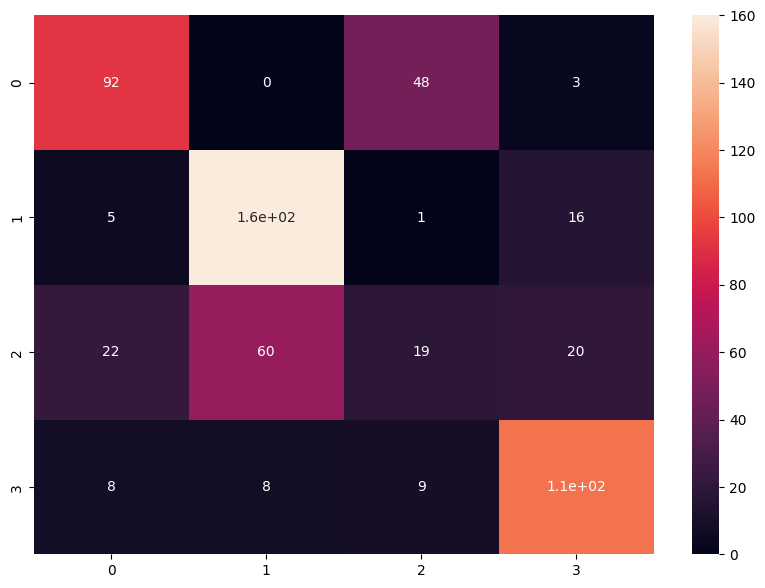

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(df_test.categ_cod, df_test.topico)

df_cm = pd.DataFrame(matrix, index=list('0123'),
                  columns=list('0123'))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

## ***Outros exemplos***

<font size=4>
<b>max_df:</b> float in range [0.0, 1.0] or int, default=1.0<br/>
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.<br/>
Google T: Ao criar o vocabulário, ignore os termos que tenham uma frequência de documento estritamente maior que o limite fornecido (palavras de parada específicas do corpus). Se flutuante, o parâmetro representa uma proporção de documentos, número absoluto de contagens. Este parâmetro será ignorado se o vocabulário não for Nenhum.
<br/>
<br/>

<b>min_df:</b> float in range [0.0, 1.0] or int, default=1<br/>
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.<br/>
Google T: Ao criar o vocabulário, ignore os termos que tenham uma frequência de documento estritamente menor que o limite especificado. Esse valor também é chamado de corte na literatura. Se flutuante, o parâmetro representa uma proporção de documentos, número absoluto de contagens. Este parâmetro será ignorado se o vocabulário não for Nenhum.
</font>

In [45]:
df_train
df_test

,nome,descricao,categoria,texto,topico,categ_cod
2700,Estojo Duo Iluminador E Bronzer Belle Angel M...,DUO ILUMINADOR E BRONZER BELLE ANGEL - B025O D...,maquiagem,Estojo Duo Iluminador E Bronzer Belle Angel M...,0,0
1297,Patrulha Canina Carrinhos De Fricção 6 Person...,Kit carrinhos da Patrulha canina Tamanho: Cerc...,brinquedo,Patrulha Canina Carrinhos De Fricção 6 Person...,0,2
3162,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,#Nossos produtos são NOVOS e 100% ORIGINAIS# ...,game,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,3,3
2895,Kite Pincel 12 Unidade,esta alta qualidade Punho de madeira Escova Co...,maquiagem,Kite Pincel 12 Unidade esta alta qualidade ...,0,0
2226,Maleta Grande P/ Maquiagem Profissional Rodin...,FOTOS REAIS DO PRODUTO - ENVIAMOS SUA MALETA C...,maquiagem,Maleta Grande P/ Maquiagem Profissional Rodin...,0,0
...,...,...,...,...,...,...
3058,Maleta Maquiagem 3d Jasmyne 105 Batons Sombra...,Maleta Jasmyne-32 sombras 3D ou matte-06 blush...,maquiagem,Maleta Maquiagem 3d Jasmyne 105 Batons Sombra...,0,0
3110,Cartão Presente Steam Gift Card R$ 200 Reais ...,.:: VOCÊ ESTÁ COMPRANDO COM A VR GAMERS ::.EST...,game,Cartão Presente Steam Gift Card R$ 200 Reais ...,3,3
1364,Kit Com 2 Pista Mágica Maluca Carros 3 Com Lu...,Pista Montável Relâmpago Mcqueen Jackson Storm...,brinquedo,Kit Com 2 Pista Mágica Maluca Carros 3 Com Lu...,0,2
641,Mais Escuro Cinquenta Tons Mais Escuros Pelos...,Sinopse:E L James revisita Cinquenta tons com ...,livro,Mais Escuro Cinquenta Tons Mais Escuros Pelos...,0,1


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

stops = nltk.corpus.stopwords.words('portuguese')

vect = TfidfVectorizer(ngram_range=(2,2), stop_words=stops, max_df=0.9, min_df=2)
vect.fit(df_train.texto)
text_vect_train = vect.transform(df_train.texto)

LDA2 = LatentDirichletAllocation(n_components=4,random_state=42)
LDA2.fit(text_vect_train)

LatentDirichletAllocation(n_components=4, random_state=42)

In [47]:
# top palavras dos tópicos
terms = vect.get_feature_names_out()

for index, topic in enumerate(LDA2.components_):
    terms_comp = zip(terms, topic)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("THE TOP 15 WORDS FOR TOPIC # "+str(index)+": ")
    #print(sorted_terms)
    print([t[0] for t in sorted_terms])
    print('\n')

THE TOP 15 WORDS FOR TOPIC # 0: 
['dragon ball', 'produto novo', '30 cm', 'harry potter', 'boneco dragon', 'delineador gel', 'luz led', 'código barras', 'son gokou', 'envio imediato', 'nacional código', 'origem nacional', 'novo físico', 'ed encadernação', 'ball son']


THE TOP 15 WORDS FOR TOPIC # 1: 
['pronta entrega', 'cabo madeira', 'mercado livre', 'call of', 'madeira cerdas', 'cílios postiços', 'of duty', 'garota calendário', 'cerdas macias', 'mia vai', 'cílios naturais', 'macias 19cm', 'duas partes', 'mídia digital', 'ruby rose']


THE TOP 15 WORDS FOR TOPIC # 2: 
['atacado wow', 'wow shop', 'vendemos atacado', 'frete produtos', 'produtos vendemos', '100 reaismandamos', 'entregafotos 100', 'original completo', 'aproximadamente 24', 'feito frete', 'reaismandamos aproximadamente', 'retirar endereço', 'ruby rose', 'vendedor combinar', 'combinar vendedor']


THE TOP 15 WORDS FOR TOPIC # 3: 
['mercado envios', 'mercado pago', 'prazo envio', 'prazo entrega', 'mercado livre', 'gta games

In [48]:
# aplica o modelo de analise de tópicos na base de teste
# vetorização
text_vect_test = vect.transform(df_test.texto)

# scoragem
results = LDA2.transform(text_vect_test)

In [49]:
df_test['topico'] = results.argmax(axis=1)

df_test['categ_cod'] = df_test.categoria.map(
   {'maquiagem': 0, 'brinquedo':1, 'game': 3, 'livro': 2}
)

df_test['categ_cod'] = df_test.categoria.map(
   {'maquiagem': 3, 'brinquedo':0, 'game': 1, 'livro': 2}
)



print(accuracy_score(df_test.categ_cod, df_test.topico))

0.3202054794520548


In [50]:
#df_test['categ_cod'] = df_test.categ_cod.astype(np.int64)

<Axes: >

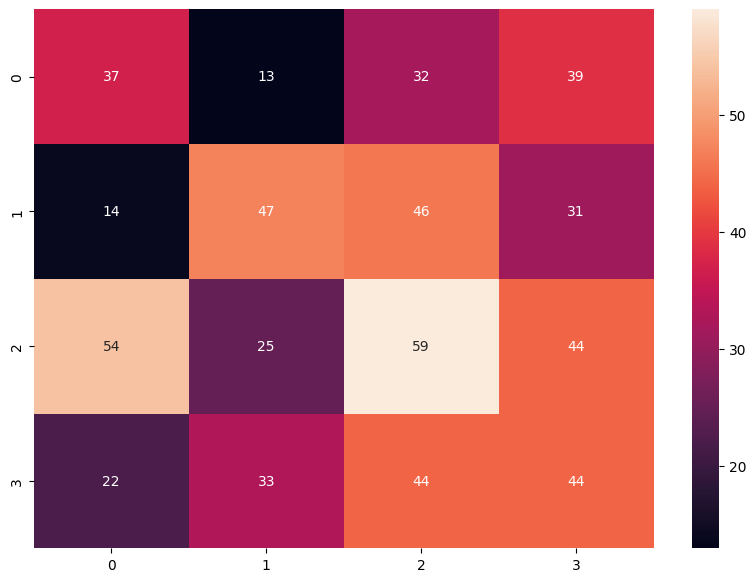

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(df_test.categ_cod, df_test.topico)

df_cm = pd.DataFrame(matrix, index=list('0123'),
                  columns=list('0123'))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [52]:
# Analisando com 8 tópicos
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

stops = nltk.corpus.stopwords.words('portuguese')

vect = TfidfVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df_train.texto)
text_vect_train = vect.transform(df_train.texto)

LDA3 = LatentDirichletAllocation(n_components=8,random_state=42)
LDA3.fit(text_vect_train)

LatentDirichletAllocation(n_components=8, random_state=42)

In [53]:
# top palavras dos tópicos
terms = vect.get_feature_names_out()

for index, topic in enumerate(LDA3.components_):
    terms_comp = zip(terms, topic)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("THE TOP 15 WORDS FOR TOPIC # "+str(index)+": ")
    #print(sorted_terms)
    print([t[0] for t in sorted_terms])
    print('\n')

THE TOP 15 WORDS FOR TOPIC # 0: 
['cílios', 'ana', 'vingadores', 'grey', 'luz', 'som', 'gokou', 'son', 'produto', 'novo', 'harry', 'christian', 'boneco', 'call', 'bonecos']


THE TOP 15 WORDS FOR TOPIC # 1: 
['edição', 'livro', 'livros', 'páginas', 'produto', '00', 'vida', 'história', 'kit', 'origem', 'mundo', 'anos', 'ed', 'capa', 'novo']


THE TOP 15 WORDS FOR TOPIC # 2: 
['flex', 'laminas', 'tebori', 'hard', 'fifa', 'jogadores', 'pula', 'fisica', 'agulhas', 'bola', 'pes', 'lista', 'pontas', 'português', 'lâmina']


THE TOP 15 WORDS FOR TOPIC # 3: 
['mia', 'gel', 'inglot', 'delineador', 'calendário', 'garota', 'págs', 'precisa', 'vai', 'tebori', 'produto', 'flexi', 'fica', 'kunai', 'mês']


THE TOP 15 WORDS FOR TOPIC # 4: 
['mercado', 'pincel', 'entrega', 'prazo', 'produto', 'cores', 'pagamento', 'produtos', 'maquiagem', 'kit', 'envio', 'maleta', 'pronta', 'dias', 'frete']


THE TOP 15 WORDS FOR TOPIC # 5: 
['miss', 'marrom', 'sobrancelha', 'prova', 'gel', 'rose', 'tatuagem', 'cartão

## ***Exercício***

Como já samemos, a base de dados de "produto" [1] foi utilizada para modelos de classificação supervisionados e sabemos qual foi a configuração que gerou um bom resultado. Que tal aplicarmos essas técnicas de pré-processamento que gerou um bom modelo e compararmos? Faça um teste de análise de tópicos com 4 tópicos conse as seguintes configurações:

*   Remover registros com valores nulos;
*   Contatenar as colunas de nome e descrição;
*   Aplicar lematização em verbos;
*   Amostra de 30% para teste e random_state = 42;
*   Vetorização de contagem dos termos em unigramas removendo stopwords (NLTK).

[1] https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv


In [54]:
import pandas as pd

df = pd.read_csv("https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8')

In [55]:
# respota
df.isnull().sum()
df_new = df.dropna()
df_new.isnull().sum()

nome         0
descricao    0
categoria    0
dtype: int64

In [56]:
df_new["texto"] = df_new["nome"] + " " + df_new["descricao"]

df_new.head()

<ipython-input-56-caaa085623df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["texto"] = df_new["nome"] + " " + df_new["descricao"]


,nome,descricao,categoria,texto
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...


In [57]:
# função de lematização para os verbos do documento
def lemmatizer_verbs(text):
  sent = []
  doc = nlp(text)
  for word in doc:
      if word.pos_ == "VERB":
          sent.append(word.lemma_)
      else:
          sent.append(word.text)
  return " ".join(sent)

In [58]:
!python -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 63.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [59]:

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
import spacy
nlp = spacy.load('pt_core_news_sm')

df_new["texto_lem"] = df_new["texto"].apply(lemmatizer_verbs)

df_new.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-59-f6e7126233cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["texto_lem"] = df_new["texto"].apply(lemmatizer_verbs)


,nome,descricao,categoria,texto,texto_lem
0,O Hobbit - 7ª Ed. 2013,Produto NovoBilbo Bolseiro é um hobbit que lev...,livro,O Hobbit - 7ª Ed. 2013 Produto NovoBilbo Bol...,O Hobbit - 7ª Ed . 2013 Produto NovoBilbo ...
1,Livro - It A Coisa - Stephen King,Produto NovoDurante as férias escolares de 195...,livro,Livro - It A Coisa - Stephen King Produto No...,Livro - It A Coisa - Stephen King Produto ...
2,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Produto NovoTodo o reino de Westeros ao alcanc...,livro,Box As Crônicas De Gelo E Fogo Pocket 5 Li...,Box As Crônicas De Gelo E Fogo Pocket ...
3,Box Harry Potter,Produto Novo e Físico A série Harry Potter ch...,livro,Box Harry Potter Produto Novo e Físico A sé...,Box Harry Potter Produto Novo e Físico A...
4,Livro Origem - Dan Brown,Produto NovoDe Onde Viemos? Para Onde Vamos? R...,livro,Livro Origem - Dan Brown Produto NovoDe Onde...,Livro Origem - Dan Brown Produto NovoDe On...


In [64]:
# amostra
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_new,
      test_size = 0.3,
      random_state = 42
  )

In [65]:
# vetorização
stops = nltk.corpus.stopwords.words('portuguese')

# vetorização
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df_train.texto_lem)
text_vect_train = vect.transform(df_train.texto_lem)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
LDA2 = LatentDirichletAllocation(n_components=4,random_state=42)
LDA2.fit(text_vect_train)

LatentDirichletAllocation(n_components=4, random_state=42)

In [67]:
# top palavras dos tópicos
terms = vect.get_feature_names_out()

for index, topic in enumerate(LDA2.components_):
    terms_comp = zip(terms, topic)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:15]
    print("THE TOP 15 WORDS FOR TOPIC # "+str(index)+": ")
    #print(sorted_terms)
    print([t[0] for t in sorted_terms])
    print('\n')

THE TOP 15 WORDS FOR TOPIC # 0: 
['pincel', 'cm', 'maquiagem', 'kit', 'cores', '01', 'maleta', 'profissional', 'base', 'produto', 'matte', 'sombra', 'cor', 'cílios', 'ruby']


THE TOP 15 WORDS FOR TOPIC # 1: 
['mercado', 'produto', 'prazo', 'pagamento', 'produtos', 'entrega', 'envio', 'enviar', 'dias', 'frete', 'anúncio', 'comprar', 'cliente', 'gta', 'após']


THE TOP 15 WORDS FOR TOPIC # 2: 
['produto', 'edição', 'livro', 'páginas', 'ter', 'poder', 'mundo', 'novo', 'vida', 'anos', 'história', '00', 'capa', 'origem', 'livros']


THE TOP 15 WORDS FOR TOPIC # 3: 
['jogo', 'compra', 'frete', 'digital', 'the', 'vendedor', 'ter', 'retirar', 'original', 'poder', 'produto', 'jogar', 'of', 'online', 'envio']




In [69]:
# aplica o modelo de analise de tópicos na base de teste
# vetorização
text_vect_test = vect.transform(df_test.texto)

# scoragem
results = LDA2.transform(text_vect_test)

In [70]:
# contagem
print(text_vect_train.shape)
print(text_vect_test.shape)

print(text_vect_train.shape[0]+text_vect_test.shape[0])

(2041, 28083)
(875, 28083)
2916


In [71]:
results[0]

array([0.92191736, 0.00548953, 0.02522248, 0.04737064])

In [72]:
results.argmax(axis=1)

array([0, 0, 2, 0, 0, 2, 1, 2, 3, 3, 1, 1, 0, 1, 3, 1, 1, 1, 2, 2, 3, 1,
       3, 0, 3, 0, 2, 0, 0, 0, 3, 2, 2, 2, 3, 3, 1, 1, 0, 0, 2, 3, 1, 3,
       2, 3, 2, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 3, 2, 0, 3, 3, 2, 2, 2, 2,
       0, 2, 0, 1, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 3, 2, 0, 0, 0, 0, 0, 3,
       0, 2, 2, 1, 2, 2, 2, 2, 1, 1, 3, 1, 3, 0, 2, 3, 3, 0, 0, 0, 3, 0,
       2, 3, 3, 2, 0, 3, 3, 3, 3, 3, 2, 0, 2, 1, 1, 3, 3, 0, 3, 1, 1, 1,
       2, 2, 2, 2, 2, 0, 1, 2, 3, 0, 1, 3, 3, 3, 1, 1, 2, 2, 2, 3, 3, 1,
       3, 1, 2, 1, 0, 2, 2, 3, 3, 0, 0, 3, 2, 1, 0, 2, 1, 3, 1, 2, 2, 0,
       0, 1, 3, 2, 2, 1, 1, 2, 3, 2, 2, 0, 2, 3, 3, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 0, 3, 0, 1,
       0, 0, 1, 0, 0, 2, 1, 1, 0, 3, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 2, 1,
       0, 3, 1, 2, 0, 0, 2, 3, 3, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 2,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 3, 1, 0, 2, 1, 1, 3, 3, 0, 2, 2, 2,
       3, 2, 2, 1, 1, 3, 2, 0, 2, 1, 1, 1, 1, 0, 3,

In [73]:
# seleciona o tópico com a maior probabilidade
df_test['topico'] = results.argmax(axis=1)

df_test.head()

,nome,descricao,categoria,texto,texto_lem,topico
2700,Estojo Duo Iluminador E Bronzer Belle Angel M...,DUO ILUMINADOR E BRONZER BELLE ANGEL - B025O D...,maquiagem,Estojo Duo Iluminador E Bronzer Belle Angel M...,Estojo Duo Iluminador E Bronzer Belle Angel ...,0
1297,Patrulha Canina Carrinhos De Fricção 6 Person...,Kit carrinhos da Patrulha canina Tamanho: Cerc...,brinquedo,Patrulha Canina Carrinhos De Fricção 6 Person...,Patrulha Canina Carrinhos De Fricção 6 Perso...,0
3162,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,#Nossos produtos são NOVOS e 100% ORIGINAIS# ...,game,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,Pokemon Ultra Moon Nintendo 3ds Midia Fisica...,2
2895,Kite Pincel 12 Unidade,esta alta qualidade Punho de madeira Escova Co...,maquiagem,Kite Pincel 12 Unidade esta alta qualidade ...,Kite Pincel 12 Unidade esta alta qualida...,0
2226,Maleta Grande P/ Maquiagem Profissional Rodin...,FOTOS REAIS DO PRODUTO - ENVIAMOS SUA MALETA C...,maquiagem,Maleta Grande P/ Maquiagem Profissional Rodin...,Maleta Grande P/ Maquiagem Profissional Rodi...,0


In [79]:
# aplica de/para da classificação no dataframe
import numpy as np

df_test['categ_cod'] = df_test.categoria.map(
    {'maquiagem': 0, 'brinquedo':1, 'livro': 2, 'game': 3}
    )

'''
0 - maquiagem
1 - brinquedo
2 - livro
3 - game
'''

'\n0 - maquiagem\n1 - brinquedo\n2 - livro \n3 - game\n'

In [80]:
df_test.head()

,nome,descricao,categoria,texto,texto_lem,topico,categ_cod
2700,Estojo Duo Iluminador E Bronzer Belle Angel M...,DUO ILUMINADOR E BRONZER BELLE ANGEL - B025O D...,maquiagem,Estojo Duo Iluminador E Bronzer Belle Angel M...,Estojo Duo Iluminador E Bronzer Belle Angel ...,0,0
1297,Patrulha Canina Carrinhos De Fricção 6 Person...,Kit carrinhos da Patrulha canina Tamanho: Cerc...,brinquedo,Patrulha Canina Carrinhos De Fricção 6 Person...,Patrulha Canina Carrinhos De Fricção 6 Perso...,0,1
3162,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,#Nossos produtos são NOVOS e 100% ORIGINAIS# ...,game,Pokemon Ultra Moon Nintendo 3ds Midia Fisica ...,Pokemon Ultra Moon Nintendo 3ds Midia Fisica...,2,3
2895,Kite Pincel 12 Unidade,esta alta qualidade Punho de madeira Escova Co...,maquiagem,Kite Pincel 12 Unidade esta alta qualidade ...,Kite Pincel 12 Unidade esta alta qualida...,0,0
2226,Maleta Grande P/ Maquiagem Profissional Rodin...,FOTOS REAIS DO PRODUTO - ENVIAMOS SUA MALETA C...,maquiagem,Maleta Grande P/ Maquiagem Profissional Rodin...,Maleta Grande P/ Maquiagem Profissional Rodi...,0,0


In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(df_test.categ_cod, df_test.topico))

0.7645714285714286


<Axes: >

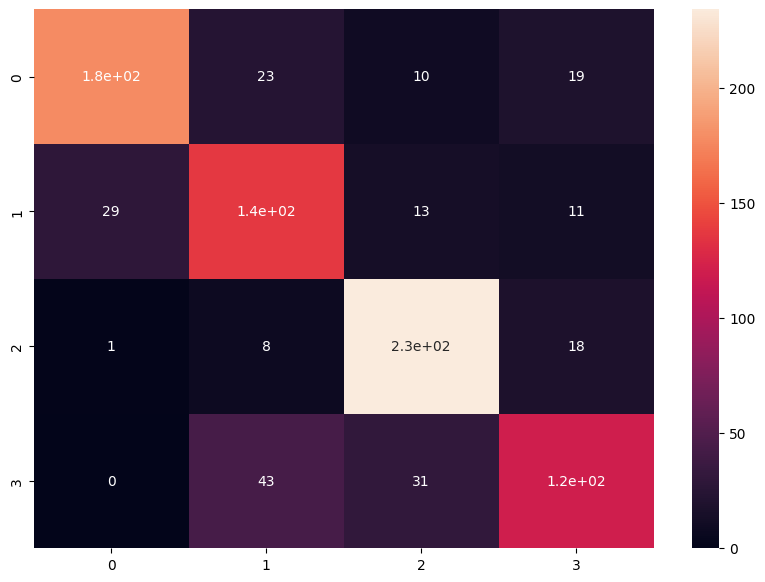

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

matrix = confusion_matrix(df_test.categ_cod, df_test.topico)

df_cm = pd.DataFrame(matrix, index=list('0123'),
                  columns=list('0123'))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

#***O que você achou da aula de hoje?***

Pelo aplicativo da FIAP ou pelo site

(Entrar no FIAP, e no menu clicar em Experience Survey)

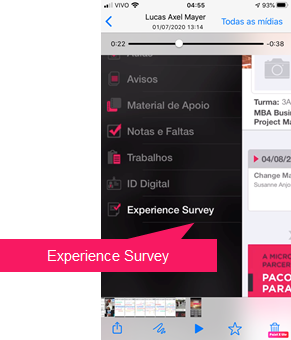